In [1]:
# Import the usual suspects.

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_context('paper')



def print_ln():
    print('-' * 80, '\n')


In [11]:
test = pd.read_csv("../data/processed/final.test.tsv", "\t", index_col='SampleID')
test.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR8552929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR067629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR067714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR5065314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [12]:
train = pd.read_csv("../data/processed/final.train.tsv", "\t", index_col='SampleID')
train.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR10380004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR6807701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR11033700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR1163101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [13]:
X_train = train.loc[:, train.columns != 'Resistance_Status']
y_train = train.loc[:, 'Resistance_Status']


In [14]:
X_test = test.loc[:, test.columns != 'Resistance_Status']
y_test = test.loc[:, 'Resistance_Status']


In [15]:
# code to justify the selection of 2 components

pca = PCA()

X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

print(explained_variance[:5])

explained_variance_ratio_ = np.around(pca.explained_variance_ratio_, decimals=3)
print(explained_variance_ratio_)

[0.15798379 0.08453758 0.05579681 0.05326611 0.04640476]
[0.158 0.085 0.056 ... 0.    0.    0.   ]


In [16]:

pca = PCA(n_components= 50)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)


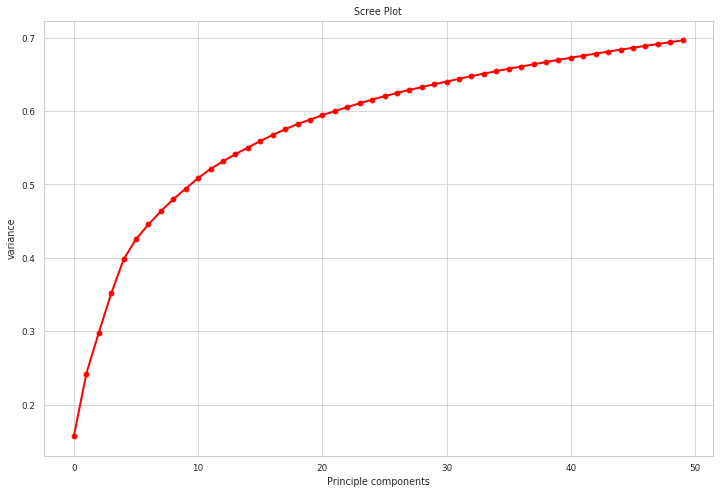

In [17]:

fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principle components')
plt.ylabel('variance')
plt.show()

In [22]:

pca = PCA(n_components= 100)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)


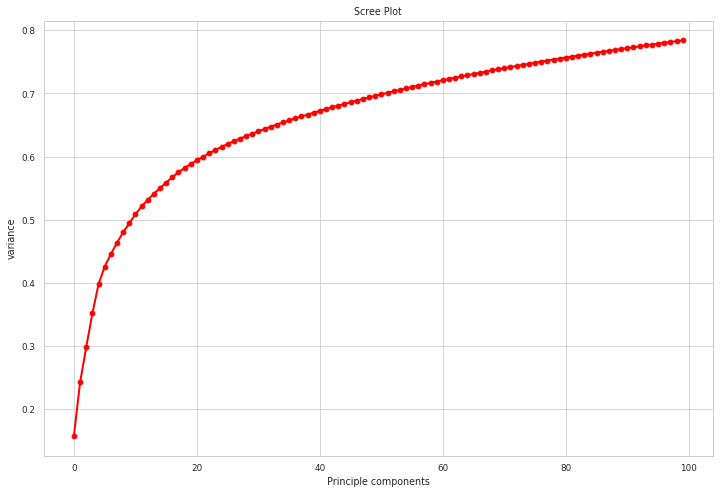

In [23]:

fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principle components')
plt.ylabel('variance')
plt.show()

In [24]:

pca = PCA(n_components= 150)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)


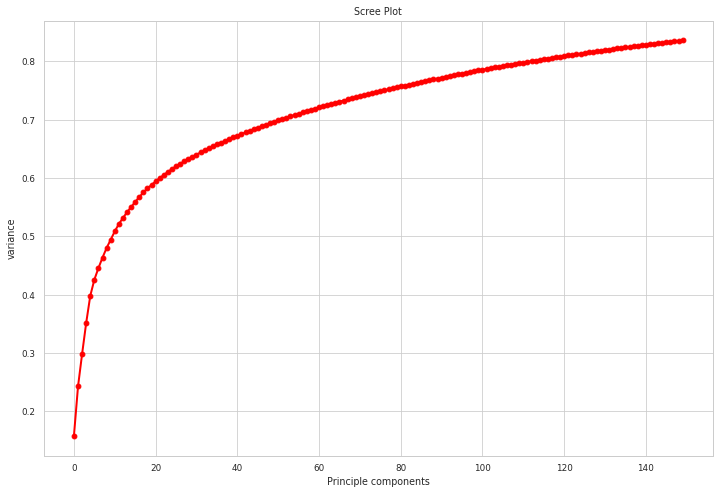

In [25]:

fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principle components')
plt.ylabel('variance')
plt.show()

In [26]:

pca = PCA(n_components= 200)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)


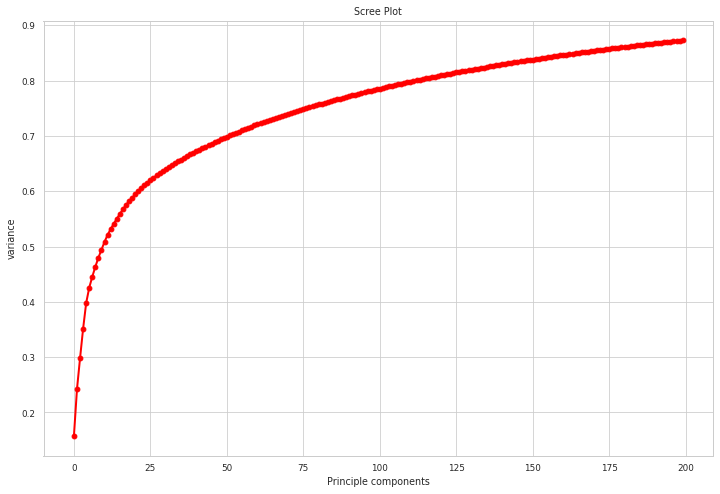

In [27]:

fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principle components')
plt.ylabel('variance')
plt.show()

In [ ]:
pca = PCA(n_components= 50)
principal_components = pca.fit_transform(X)
X_principal_df = pd.DataFrame(data = principal_components,
                           index= X.index,
                           # columns = ['PC_1', 'PC_2']
                             )
X_principal_df.head()


In [ ]:
pca_df= pd.concat([X_principal_df, y], axis=1)
pca_df.head()

In [ ]:
# pca_df.to_csv("../data/processed/pca_df.csv")
pca_df = pd.read_csv("../data/processed/final.pca_df.csv")
pca_df.head()

In [ ]:
pca_df.isnull().values.any()

In [ ]:
# https://stackoverflow.com/questions/33603787/performing-pca-on-large-sparse-matrix-by-using-sklearn